`period` contains 4206963 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.



The radius of the planet with period of ~13 days is 1.741651476568241⋅10^7 meters


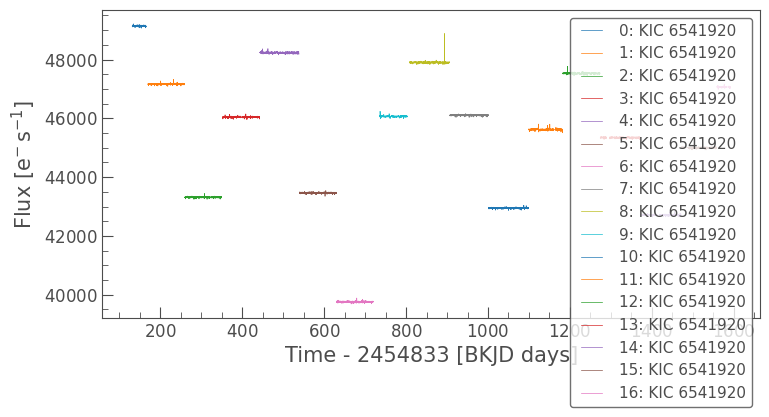

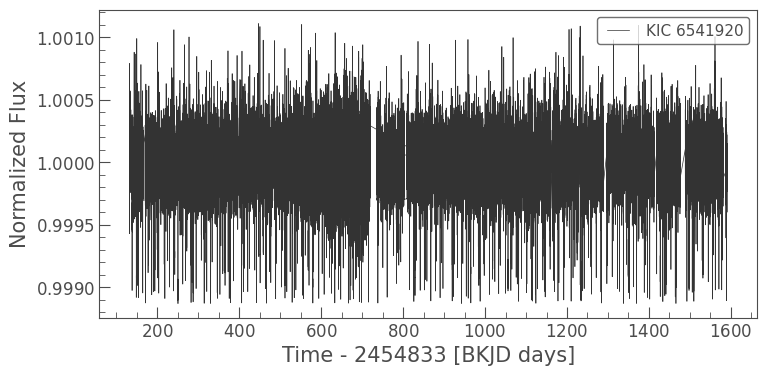

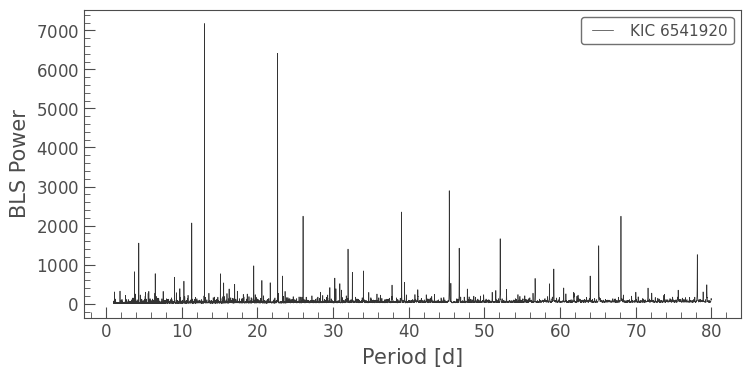

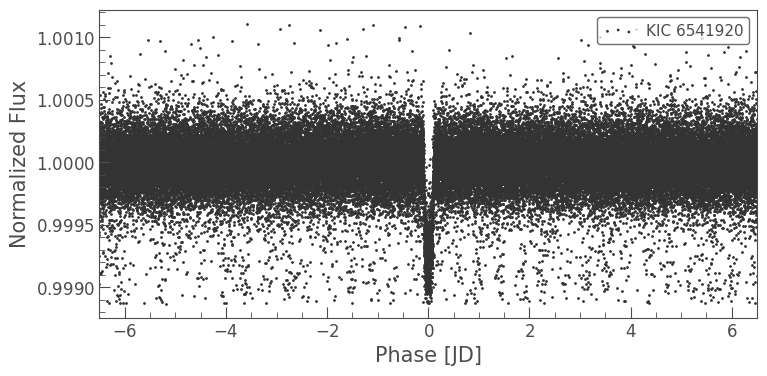

In [1]:
# %%
import lightkurve as lk
%matplotlib inline
# Search for Kepler observations of Kepler-11
search_result = lk.search_lightcurve('Kepler-11', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot(); 
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot()
import numpy as np
# Create array of periods to search
period = np.linspace(1, 80, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period);
bls.plot();
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-6.5, 6.5);

#Finding the radius
depth = bls.depth_at_max_power
radius = np.power(depth*np.power(7.096*(10**8),2),0.5)
print("\nThe radius of the planet with period of ~13 days is " + str(radius*(10**-7)) + "⋅10^7 meters")

In [ ]:
#Im pretty sure that this works, but if the semimajor axis length a is wrong then everything goes to hell
R_SUN = 6.957e8 #radius of the sun in meters
def T_planet(lc, a, albedo=0.5):
    """
    lc = the downloaded light curve from the search result
    a = semimajor axis length (in terms of meters)
    albedo = ratio of reflected light to incoming light
    returns the temperature of the planet in Kelvin
    """
    T,R = lc.meta["TEFF"],lc.meta["RADIUS"]*R_SUN
    return T*np.pow((R**2)*(1-albedo)/(4*a**2),1/4) #Radiative Equilibrium Temperature (assuming BlackBody radiation going in and out is the same)

In [ ]:
T_planet(lc,6.97e10) #Kepler 11g with albedo of 0.5

np.float64(343.6957302342949)

In [15]:
dir(search_result[0])
# a = search_result[0].download()
# print(search_result[0].distance)
# a
lc.meta

OrderedDict([('INHERIT', True),
             ('EXTNAME', 'PRIMARY'),
             ('EXTVER', 1),
             ('TELESCOP', 'Kepler'),
             ('INSTRUME', 'Kepler Photometer'),
             ('OBJECT', 'KIC 6541920'),
             ('KEPLERID', 6541920),
             ('RADESYS', 'ICRS'),
             ('RA_OBJ', 297.115121),
             ('DEC_OBJ', 41.90914),
             ('EQUINOX', 2000.0),
             ('EXPOSURE', 29.27240499),
             ('TIMEREF', 'SOLARSYSTEM'),
             ('TASSIGN', 'SPACECRAFT'),
             ('TIMESYS', 'TDB'),
             ('BJDREFI', 2454833),
             ('BJDREFF', 0.0),
             ('TIMEUNIT', 'd'),
             ('TELAPSE', 31.79588817),
             ('LIVETIME', 29.27240499),
             ('TSTART', 1559.21531232),
             ('TSTOP', 1591.01120049),
             ('LC_START', 56391.72690412),
             ('LC_END', 56423.50115222),
             ('DEADC', 0.92063492),
             ('TIMEPIXR', 0.5),
             ('TIERRELA', 5.78e-07),
  